# Deep Learning A Z Recorrente - Bolsa uma saída

In [25]:
import numpy as np
import pandas as pd
import matplotlib
import tensorflow as tf
import sklearn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [26]:
base = pd.read_csv('petr4_treinamento.csv')
base

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...,...
1240,2017-12-25,15.750000,15.750000,15.750000,15.750000,15.718563,0.0
1241,2017-12-26,15.750000,15.990000,15.690000,15.970000,15.938125,22173100.0
1242,2017-12-27,15.990000,16.139999,15.980000,16.049999,16.017963,23552200.0
1243,2017-12-28,16.100000,16.129999,16.000000,16.100000,16.067865,19011500.0


In [ ]:
import yfinance as yf

# 1 - Coleta dados históricos da PETR4:
base = yf.download('PETR4.SA', start='2013-01-02', end='2024-12-31')
print(base.head(10))

# 2 - Pré-processamento dos dados:
print("\n", base.isnull().sum())
base = base.dropna()
base.shape

# 3 - Separação dos dados e normalização:
base_treinamento = base.iloc[:, 1:2].values # queremos a primeira coluna, intervalo de 1 a 2 (indice 1 é a abertura)
normalizador = MinMaxScaler(feature_range=(0, 1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)
print("\n", base_treinamento_normalizada)
X = [] # previsores
y = [] # preço real
for i in range(90, 1242): # os 90 preços anteriores são utilizados para prever o 91°
  X.append(base_treinamento_normalizada[i - 90:i, 0])
  y.append(base_treinamento_normalizada[i, 0])
  #print(i, i - 90)
X, y = np.array(X), np.array(y)

[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open    Volume
Ticker      PETR4.SA  PETR4.SA  PETR4.SA  PETR4.SA  PETR4.SA
Date                                                        
2013-01-02  5.379156  5.521216  5.379156  5.461114  30182600
2013-01-03  5.573123  5.573123  5.381889  5.411940  30552600
2013-01-04  5.581318  5.633225  5.510288  5.553999  36141000
2013-01-07  5.485703  5.646886  5.450188  5.594979  28069600
2013-01-08  5.327249  5.526679  5.316321  5.493896  29091300
2013-01-09  5.376426  5.428332  5.316323  5.365498  24361100
2013-01-10  5.417404  5.477506  5.338179  5.401013  17526200
2013-01-11  5.431063  5.474774  5.381889  5.422868  18223600
2013-01-14  5.387352  5.529413  5.379157  5.466578  28302400
2013-01-15  5.414673  5.529414  5.379158  5.466580  29633900

 Price   Ticker  
Close   PETR4.SA    0
High    PETR4.SA    0
Low     PETR4.SA    0
Open    PETR4.SA    0
Volume  PETR4.SA    0
dtype: int64

 [[0.11639331]
 [0.11781472]
 [0.11946051]
 ...
 [0.95100645]
 [

In [ ]:
base[0:90]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...,...
87,2013-05-10,20.160000,20.389999,19.709999,19.959999,18.681934,22031200.0
88,2013-05-13,19.809999,19.850000,19.379999,19.490000,18.242029,21577600.0
89,2013-05-14,19.530001,19.680000,19.250000,19.549999,18.298189,30643700.0
90,2013-05-15,19.500000,19.639999,19.330000,19.570000,18.316908,21869300.0


In [ ]:
X.shape, X.shape[1]

((1152, 90), 90)

In [120]:
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences=True, input_shape = (X.shape[1], 1))) # Cada unidade é uma célula LSTM independente, com sua própria memória e portas.
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 50)) # aqui não tem return_sequence porque é a última
regressor.add(Dropout(0.3))
regressor.add(Dense(units = 1, activation = 'linear'))
regressor.summary()

c:\Users\CLIENTE\anaconda3\envs\orlando\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 90, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 90, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 90, 50)         │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 90, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 90, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 90, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,451 (435.36 KB)

 Trainable params: 111,451 (435.36 KB)

 Non-trainable params: 0 (0.00 B)

In [128]:
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

historico = regressor.fit(X, y, epochs = 10, batch_size = 32, validation_data=(X, y))

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 1.6462e-04 - mean_absolute_error: 0.0100 - val_loss: 3.2598e-04 - val_mean_absolute_error: 0.0159
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 1.4895e-04 - mean_absolute_error: 0.0095 - val_loss: 8.9845e-05 - val_mean_absolute_error: 0.0072
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 1.2938e-04 - mean_absolute_error: 0.0088 - val_loss: 8.0888e-05 - val_mean_absolute_error: 0.0068
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 1.3135e-04 - mean_absolute_error: 0.0089 - val_loss: 1.3908e-04 - val_mean_absolute_error: 0.0097
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 1.5085e-04 - mean_absolute_error: 0.0096 - val_loss: 1.2893e-04 - val_mean_absolute_error: 0.0092
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 1.4317e-04 - mean_absolute_error: 0.0094 - val_loss: 1.2227e-04 - val_mean_absolute_error: 0.0086
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss:

In [131]:
# Avaliação do modelo treinado nos dados X e y
resultado = regressor.evaluate(X, y, verbose=0)

print(f"Perda (Loss): {resultado[0]:.4f}")
print(f"Erro Absoluto Médio (MAE): {resultado[1]:.4f}")

Perda (Loss): 0.0002
Erro Absoluto Médio (MAE): 0.0112


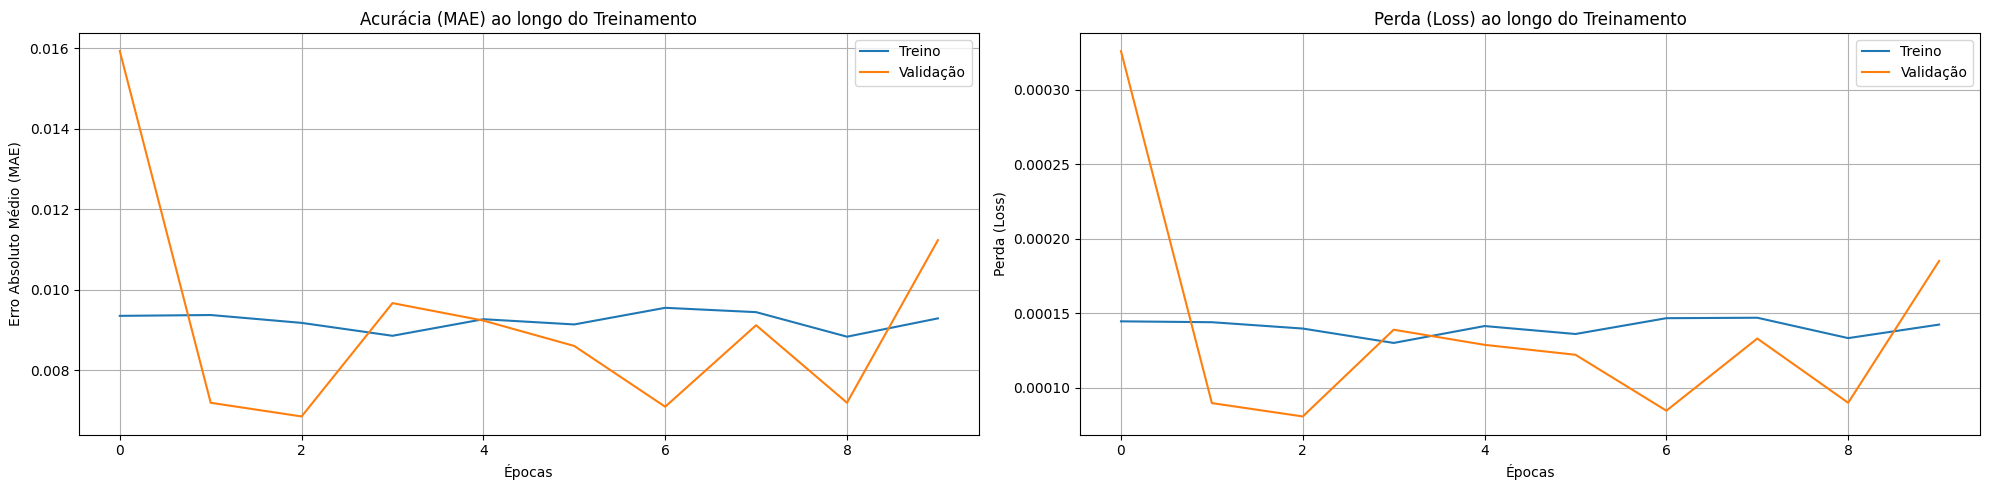

In [130]:
# Criar figura com 2 subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# --- Gráfico da Acurácia (MAE) ---
axs[0].plot(historico.history['mean_absolute_error'], label='Treino')
axs[0].plot(historico.history['val_mean_absolute_error'], label='Validação')
axs[0].set_title('Acurácia (MAE) ao longo do Treinamento')
axs[0].set_xlabel('Épocas')
axs[0].set_ylabel('Erro Absoluto Médio (MAE)')
axs[0].legend()
axs[0].grid(True)

# --- Gráfico da Perda (Loss) ---
axs[1].plot(historico.history['loss'], label='Treino')
axs[1].plot(historico.history['val_loss'], label='Validação')
axs[1].set_title('Perda (Loss) ao longo do Treinamento')
axs[1].set_xlabel('Épocas')
axs[1].set_ylabel('Perda (Loss)')
axs[1].legend()
axs[1].grid(True)

# Ajustar o layout para não sobrepor
plt.tight_layout()
plt.show()

# TESTE PARA PREVER GREVE DOS CAMINHONEIROS:

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Epoch 1/50



c:\Users\CLIENTE\anaconda3\envs\orlando\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0462
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0054
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0046
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0044
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0042
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0034
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0040
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0029
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0032
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0031
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0032
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0029
Epoch 13/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0030
Epoch 14/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0023
Epoch 15/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0021
Epoch 16/50
40/

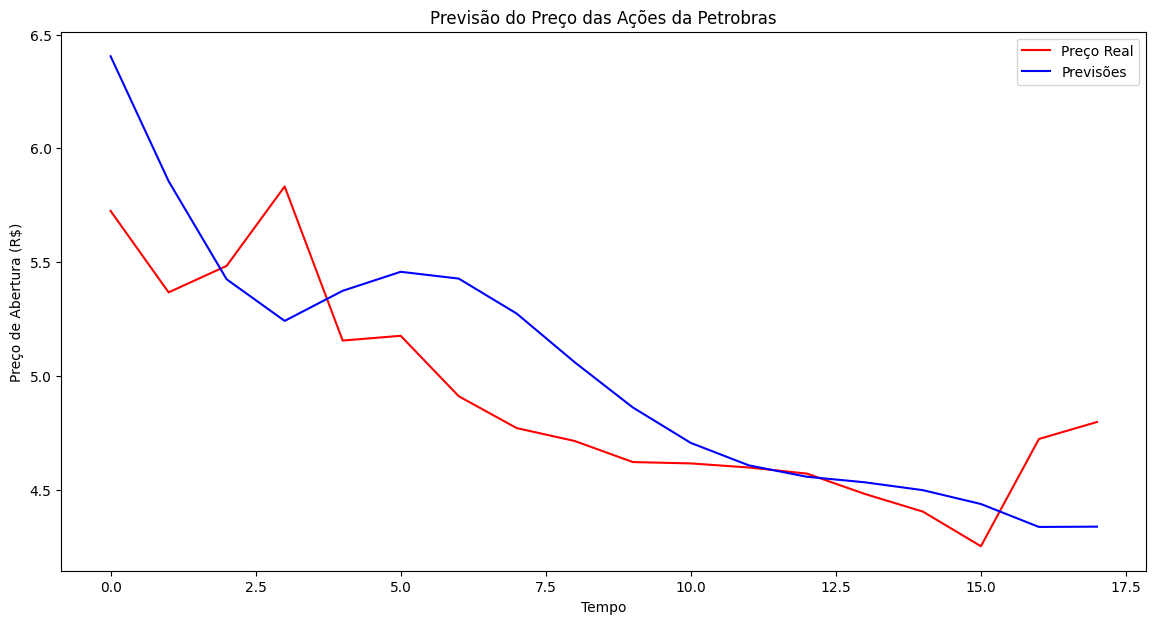

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


data_inicio_treino = '2013-01-01'
data_fim_treino = '2018-05-25'  # Último dia antes da greve
data_inicio_teste = '2018-05-28'  # Primeiro dia após a greve
data_fim_teste = '2018-06-22'

# Baixar dados de treinamento
dados_treino = yf.download('PETR4.SA', start=data_inicio_treino, end=data_fim_treino)

# Baixar dados de teste
dados_teste = yf.download('PETR4.SA', start=data_inicio_teste, end=data_fim_teste)

# Selecionar a coluna 'Open' (preço de abertura)
preco_abertura_treino = dados_treino[['Open']].values
preco_abertura_teste = dados_teste[['Open']].values

# Normalizar os dados para o intervalo [0, 1]
normalizador = MinMaxScaler(feature_range=(0, 1))
preco_abertura_treino_normalizado = normalizador.fit_transform(preco_abertura_treino)

# Criar estruturas de dados para treinamento
X_treino = []
y_treino = []
for i in range(90, len(preco_abertura_treino_normalizado)):
    X_treino.append(preco_abertura_treino_normalizado[i-90:i, 0])
    y_treino.append(preco_abertura_treino_normalizado[i, 0])
X_treino, y_treino = np.array(X_treino), np.array(y_treino)
X_treino = np.reshape(X_treino, (X_treino.shape[0], X_treino.shape[1], 1))

# Preparar dados de entrada para teste
dados_completos = pd.concat((dados_treino['Open'], dados_teste['Open']), axis=0)
entradas = dados_completos[len(dados_completos) - len(dados_teste) - 90:].values
entradas = entradas.reshape(-1, 1)
entradas = normalizador.transform(entradas)

X_teste = []
for i in range(90, 90 + len(preco_abertura_teste)):
    X_teste.append(entradas[i-90:i, 0])
X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))

modelo = Sequential()

modelo.add(LSTM(units=100, return_sequences=True, input_shape=(X_treino.shape[1], 1)))
modelo.add(Dropout(0.2))

modelo.add(LSTM(units=100, return_sequences=True))
modelo.add(Dropout(0.2))

modelo.add(LSTM(units=100, return_sequences=True))
modelo.add(Dropout(0.2))

modelo.add(LSTM(units=100))
modelo.add(Dropout(0.2))

modelo.add(Dense(units=1))

modelo.compile(optimizer='adam', loss='mean_squared_error')
modelo.fit(X_treino, y_treino, epochs=50, batch_size=32)


previsoes = modelo.predict(X_teste)
previsoes = normalizador.inverse_transform(previsoes)


plt.figure(figsize=(14, 7))
plt.plot(preco_abertura_teste, color='red', label='Preço Real')
plt.plot(previsoes, color='blue', label='Previsões')
plt.title('Previsão do Preço das Ações da Petrobras')
plt.xlabel('Tempo')
plt.ylabel('Preço de Abertura (R$)')
plt.legend()
plt.show()


c:\Users\CLIENTE\anaconda3\envs\orlando\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 180, 180)       │       131,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 180, 180)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 180, 150)       │       198,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 180, 150)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 100)            │       100,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 430,141 (1.64 MB)

 Trainable params: 430,141 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 169ms/step - loss: 0.0658 - mean_absolute_error: 0.1765
Epoch 2/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - loss: 0.0129 - mean_absolute_error: 0.0906
Epoch 3/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - loss: 0.0078 - mean_absolute_error: 0.0683
Epoch 4/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - loss: 0.0087 - mean_absolute_error: 0.0705
Epoch 5/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 166ms/step - loss: 0.0079 - mean_absolute_error: 0.0688
Epoch 6/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step - loss: 0.0053 - mean_absolute_error: 0.0559
Epoch 7/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - loss: 0.0049 - mean_absolute_error: 0.0532
Epoch 8/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - loss: 0.0058 - mean_absolute_error: 0.0569
Epoch 9/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 166ms/step - loss: 0.0043 - mean_absolute_error: 0.0486
Epoch 10/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - loss: 0.0039 - mean_absolute_error: 0.0470
Epoch 11/500
37/37 

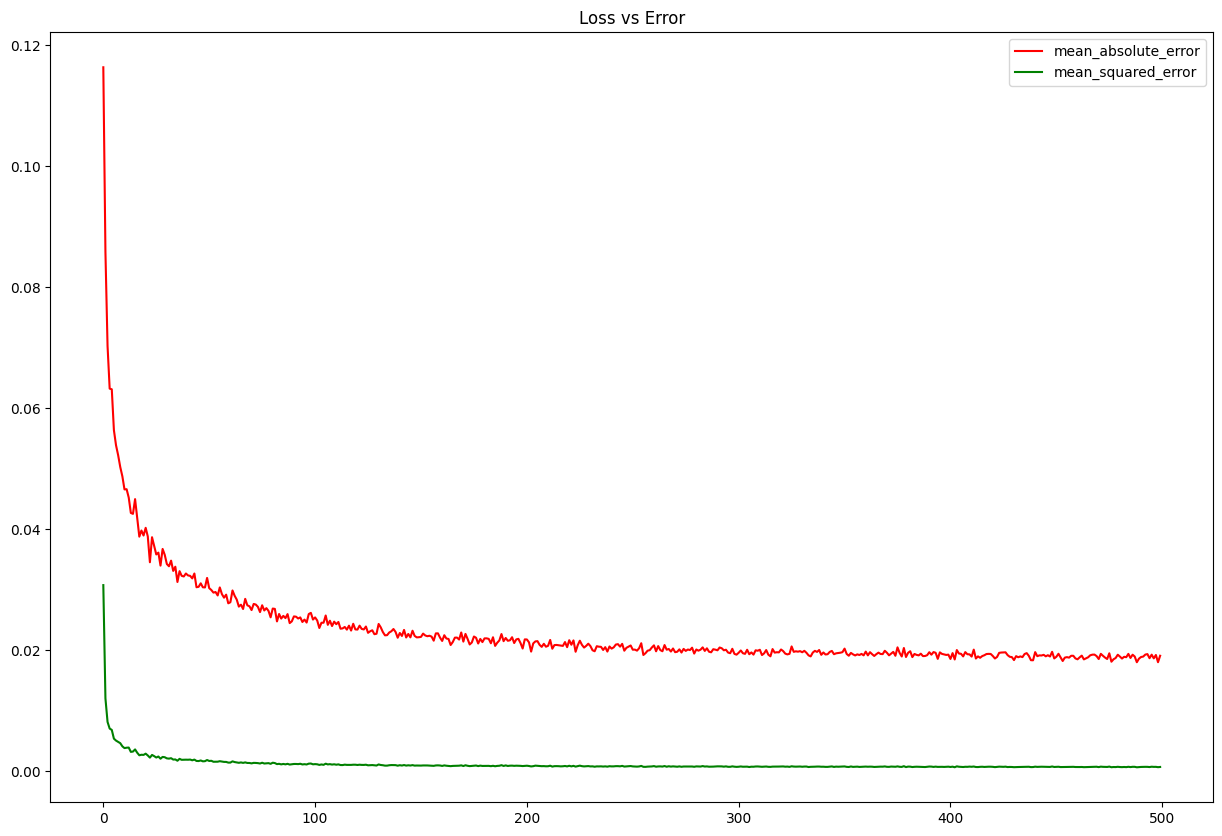

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


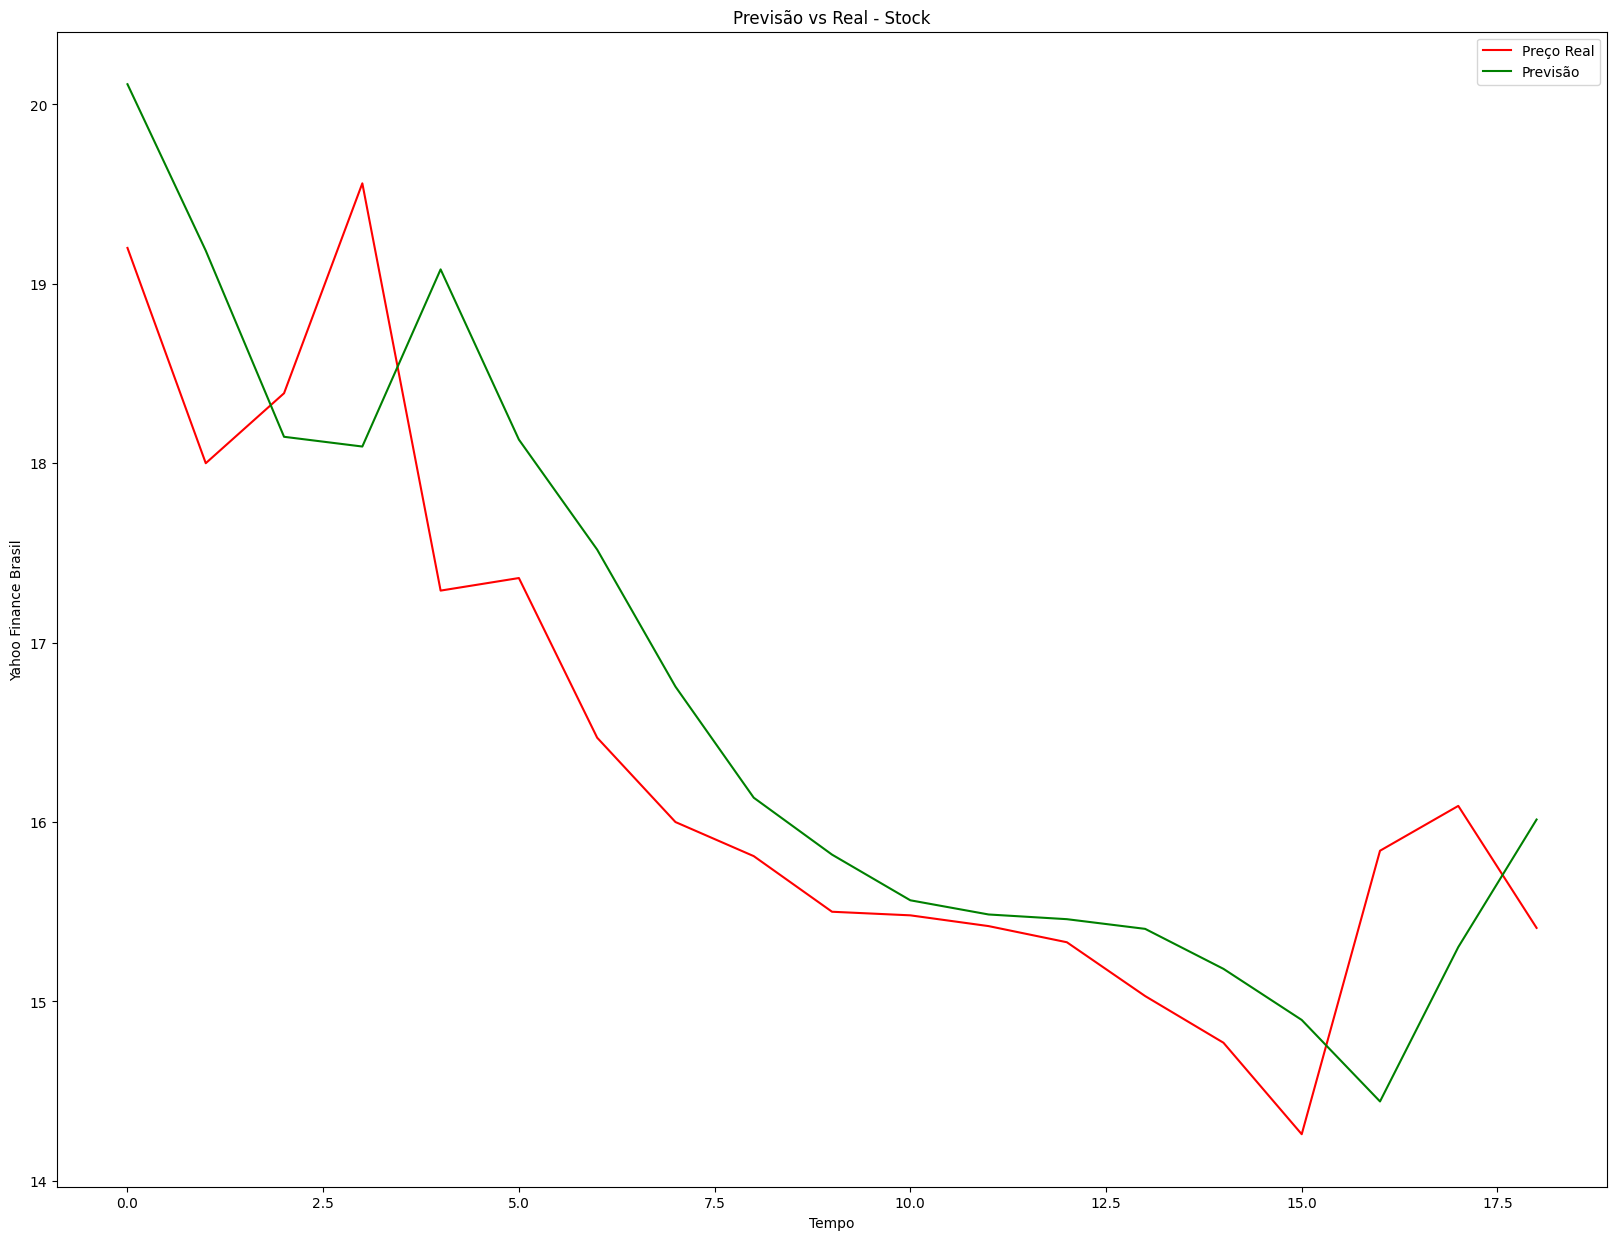

In [154]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

treinamento = pd.read_csv('https://raw.githubusercontent.com/itimes-digital/deep-learning-estudo/main/dataset/petr4_treinamento_ex.csv')

treinamento.dropna(inplace=True)

treinamento_open = treinamento.iloc[:, 1:2].values
treinamento_open

normalizador = MinMaxScaler(feature_range=(0,1))
treinamento_open_normlizado = normalizador.fit_transform(treinamento_open)
treinamento_open_normlizado

previsores = []
preco_real = []
ultimos_dias = 180

for i in range(ultimos_dias, treinamento_open_normlizado.shape[0]):
  previsores.append(treinamento_open_normlizado[i - ultimos_dias: i,0])
  preco_real.append(treinamento_open_normlizado[i, 0])

previsores, preco_real = np.array(previsores), np.array(preco_real)

previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))
previsores.shape

model = Sequential()

model.add(LSTM(units = 180, return_sequences = True, input_shape = (previsores.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 150, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100))
model.add(Dropout(0.2))

model.add(Dense(units = 1, activation = 'linear'))

model.compile(optimizer = 'rmsprop', 
              loss = 'mean_squared_error',
              metrics = ['mean_absolute_error'])

model.summary()

history_ = model.fit(previsores, preco_real, epochs = 500, batch_size = 32)

plt.figure(figsize = (15, 10))
plt.plot(history_.history['mean_absolute_error'], color = 'red', label = 'mean_absolute_error')
plt.plot(history_.history['loss'], color = 'green', label = 'mean_squared_error')
plt.title('Loss vs Error')
plt.legend()
plt.show()

base_teste = pd.read_csv('https://raw.githubusercontent.com/itimes-digital/deep-learning-estudo/main/dataset/petr4_teste_ex.csv')
base_teste.head()

preco_real_teste = base_teste.iloc[:, 1:2].values
preco_real_teste

base_completa = pd.concat((treinamento['Open'], base_teste['Open']), axis=0)
base_completa.shape

entrada_base_completa = base_completa[len(base_completa) - len(base_teste) - ultimos_dias:].values
entrada_base_completa

entrada_base_completa = entrada_base_completa.reshape(-1, 1)
entrada_base_completa.shape

entrada_base_completa = normalizador.transform(entrada_base_completa);

x_teste = []

for i in range(ultimos_dias, 199):
  x_teste.append(entrada_base_completa[i - ultimos_dias: i,0])

x_teste = np.array(x_teste)
x_teste

x_teste = np.reshape(x_teste, (x_teste.shape[0], x_teste.shape[1], 1))
x_teste.shape

previsao = model.predict(x_teste)

previsao = normalizador.inverse_transform(previsao)
previsao.mean()

preco_real_teste.mean() - previsao.mean()

previsao_real = pd.DataFrame(list(zip(previsao, preco_real_teste)), columns= ['previsao', 'preço real'])
previsao_real.tail()

plt.figure(figsize = (20,15))
plt.plot(preco_real_teste, color = 'red', label = 'Preço Real')
plt.plot(previsao, color = 'green', label = 'Previsão')
plt.title('Previsão vs Real - Stock')
plt.xlabel('Tempo')
plt.ylabel('Yahoo Finance Brasil')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

import tensorflow as tf

from tensorflow.keras.models import Sequential

from sklearn.preprocessing import MinMaxScaler

import warnings

from datetime import datetime



warnings.filterwarnings('ignore')

print(f'Data de inicio: \n{datetime.now()}')



df_trn = pd.read_csv('petr4_treinamento_ex.csv', encoding='utf-8')

df_tst = pd.read_csv('petr4_teste_ex.csv', encoding='utf-8')

df_trn.shape, df_tst.shape



df_trn.isna().sum()

df_trn = df_trn.dropna()

n_cols = [cname for cname in df_trn.select_dtypes(include=['float64']).columns.values.ravel()]



df_trn[n_cols].describe()



print(f'Treino: \n\tMin: ({df_trn['Date'].min()}), Max: ({df_trn['Date'].max()})')

print(f'Teste: \n\tMin: ({df_tst['Date'].min()}), Max: ({df_tst['Date'].max()})')



x_train = df_trn.iloc[:, 1:2].values

norm = MinMaxScaler(feature_range=(0,1))

x_train = norm.fit_transform(x_train)

x_train



x, y = [], []

for i in range(90, 1342):

    x.append(x_train[i-90:i, 0])

    y.append(x_train[i, 0])



x, y = np.array(x), np.array(y)



neural_net = Sequential([

    tf.keras.layers.LSTM(units=100, return_sequences=True, input_shape=(x.shape[1], 1)),

    tf.keras.layers.Dropout(rate=0.3),

    tf.keras.layers.LSTM(units=50, return_sequences=True),

    tf.keras.layers.Dropout(rate=0.3),

    tf.keras.layers.LSTM(units=50, return_sequences=True),

    tf.keras.layers.Dropout(rate=0.3),

    tf.keras.layers.LSTM(units=50),

    tf.keras.layers.Dropout(rate=0.3),

    tf.keras.layers.Dense(units=1, activation='linear')

])

neural_net.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error'])



neural_net.fit(x, y, epochs=100, batch_size=32)



y_test = df_tst.iloc[:, 1:2].values

df = pd.concat([df_trn['Open'], df_tst['Open']], axis=0)

inputs = df[len(df) - len(df_tst) - 90:].values

inputs = inputs.reshape(-1, 1)

inputs = norm.fit_transform(inputs)



x_test = []

for i in range(90, 109):

    x_test.append(inputs[i-90:i, 0])



x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))



y_pred = neural_net.predict(x_test)

y_pred = norm.inverse_transform(y_pred)



fig, ax = plt.subplots(figsize=(5,3), layout='constrained')

ln1 = plt.plot(y_test, color='#01B8AA', lw=1.5, label=['Preço'])

ln2 = plt.plot(y_pred, color='#374649', lw=1.5, label=['Previsão'])



plt.legend()

ax.set_title('Previsão do preço das ações', fontdict={

    'font': 'Segoe UI',

    'fontsize': 12,

    'color': 'b'

})

ax.set_xlabel('Tempo (dia)')

ax.set_ylabel('Preço')



plt.show()

# ROLANDO

### 1. Coleta de Dados

In [1]:
import yfinance as yf

# Coleta dados históricos da Apple
dados = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
precos = dados['Close']
precos.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2015-01-02,24.320436
2015-01-05,23.635286
2015-01-06,23.637514
2015-01-07,23.968966
2015-01-08,24.889898


### 2. Pré-processamento: Normalização + Criação de janelas de sequência

In [2]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Normalizar
scaler = MinMaxScaler()
precos_normalizados = scaler.fit_transform(precos.values.reshape(-1, 1))

# Criação de janelas (lookback = 20 dias)
lookback = 20
X, y = [], []

for i in range(lookback, len(precos_normalizados)):
    X.append(precos_normalizados[i-lookback:i])
    y.append(precos_normalizados[i])

X, y = np.array(X), np.array(y)

### 3. Separação treino/teste e conversão para tensores:

In [4]:
import torch
from torch.utils.data import DataLoader, TensorDataset

train_size = int(0.8 * len(X))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Conversão
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)

X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=32, shuffle=True)

### 4. Definição do Modelo LSTM:

In [5]:
import torch.nn as nn

class LSTM_Acao(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=1):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, (hn, cn) = self.lstm(x)
        return self.fc(out[:, -1, :])  # previsão baseada no último hidden state

### 5. Treinamento

In [6]:
model = LSTM_Acao()
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Treinamento
for epoch in range(20):
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        output = model(batch_X)
        loss = loss_fn(output, batch_y)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} - Loss: {loss.item():.6f}")

Epoch 1 - Loss: 0.009505
Epoch 2 - Loss: 0.000623
Epoch 3 - Loss: 0.000717
Epoch 4 - Loss: 0.000265
Epoch 5 - Loss: 0.000198
Epoch 6 - Loss: 0.000283
Epoch 7 - Loss: 0.000373
Epoch 8 - Loss: 0.000237
Epoch 9 - Loss: 0.000560
Epoch 10 - Loss: 0.000132
Epoch 11 - Loss: 0.000136
Epoch 12 - Loss: 0.000073
Epoch 13 - Loss: 0.000152
Epoch 14 - Loss: 0.000013
Epoch 15 - Loss: 0.000071
Epoch 16 - Loss: 0.000144
Epoch 17 - Loss: 0.000097
Epoch 18 - Loss: 0.000142
Epoch 19 - Loss: 0.000083
Epoch 20 - Loss: 0.000079


### 6. Avaliação e Visualização:

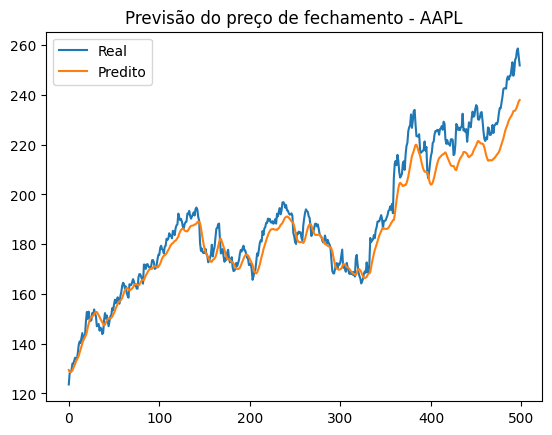

In [7]:
import matplotlib.pyplot as plt

with torch.no_grad():
    pred = model(X_test_t).numpy()
    real = y_test_t.numpy()
    pred_desnormalizado = scaler.inverse_transform(pred)
    real_desnormalizado = scaler.inverse_transform(real)

plt.plot(real_desnormalizado, label='Real')
plt.plot(pred_desnormalizado, label='Predito')
plt.legend()
plt.title("Previsão do preço de fechamento - AAPL")
plt.show()

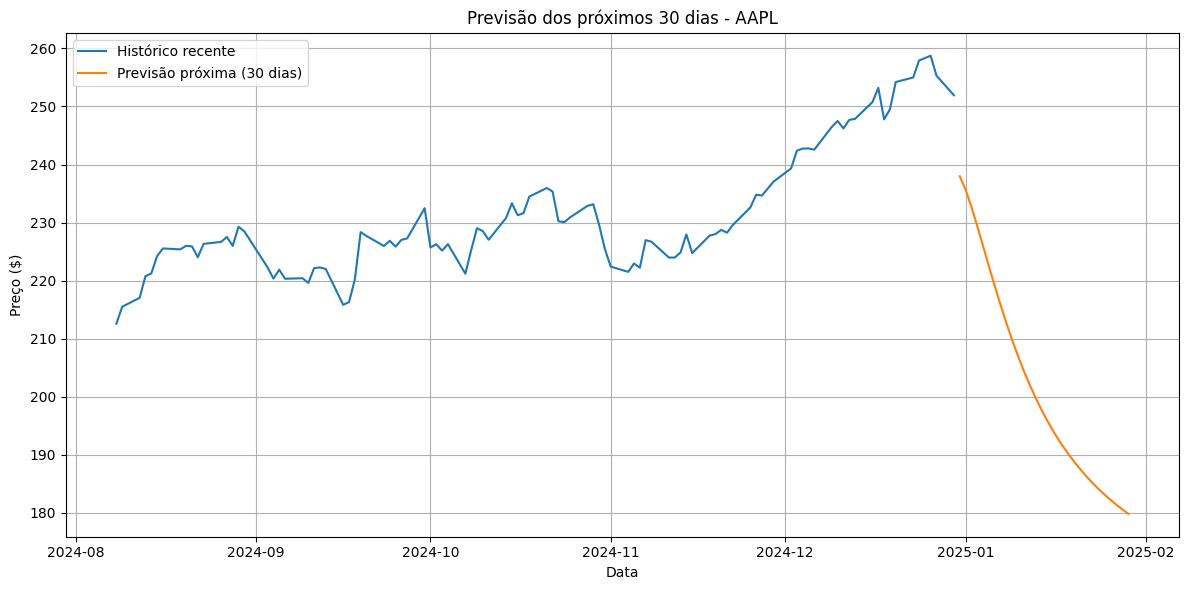

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

# Parâmetros
dias_para_prever = 30
lookback = X_train.shape[1]  # janela usada no treinamento

# Última sequência de entrada para iniciar a previsão
entrada = X_test_t[-1].unsqueeze(0).clone()  # shape: (1, lookback, 1)
previsoes_futuras = []

# Geração das previsões futuras
model.eval()
with torch.no_grad():
    for _ in range(dias_para_prever):
        pred = model(entrada)  # tensor shape [1, 1]
        previsoes_futuras.append(pred.item())  # extrai valor escalar
        entrada = torch.cat([entrada[:, 1:, :], pred.unsqueeze(2)], dim=1)  # atualiza sequência

# Desnormalização das previsões
previsoes_array = np.array(previsoes_futuras).reshape(-1, 1)
previsoes_desnormalizadas = scaler.inverse_transform(previsoes_array)

# Cria datas futuras com base na última data conhecida
ultima_data = precos.index[-1]
datas_futuras = pd.date_range(start=ultima_data + pd.Timedelta(days=1), periods=dias_para_prever)

# Plotando resultados
plt.figure(figsize=(12, 6))
plt.plot(precos.index[-100:], precos.values[-100:], label="Histórico recente")
plt.plot(datas_futuras, previsoes_desnormalizadas, label=f"Previsão próxima ({dias_para_prever} dias)")
plt.xlabel("Data")
plt.ylabel("Preço ($)")
plt.title(f"Previsão dos próximos {dias_para_prever} dias - AAPL")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 7. Derivadas parciais envolvidas no LSTM:

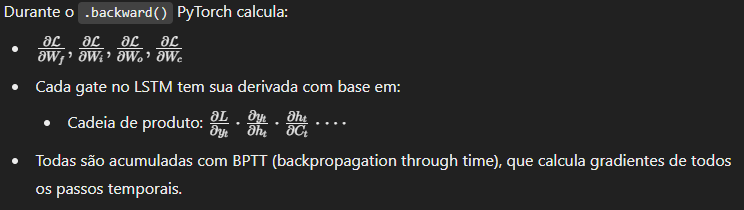

# EXEMPLO 2: modelo mais robusto para prever ações

[*********************100%***********************]  1 of 1 completed


Epoch 20, Loss: 0.012216
Epoch 40, Loss: 0.000525
Epoch 60, Loss: 0.000469
Epoch 80, Loss: 0.000439
Epoch 100, Loss: 0.000419
Epoch 120, Loss: 0.000403
Epoch 140, Loss: 0.000385
Epoch 160, Loss: 0.000395
Epoch 180, Loss: 0.000363
Epoch 200, Loss: 0.000355


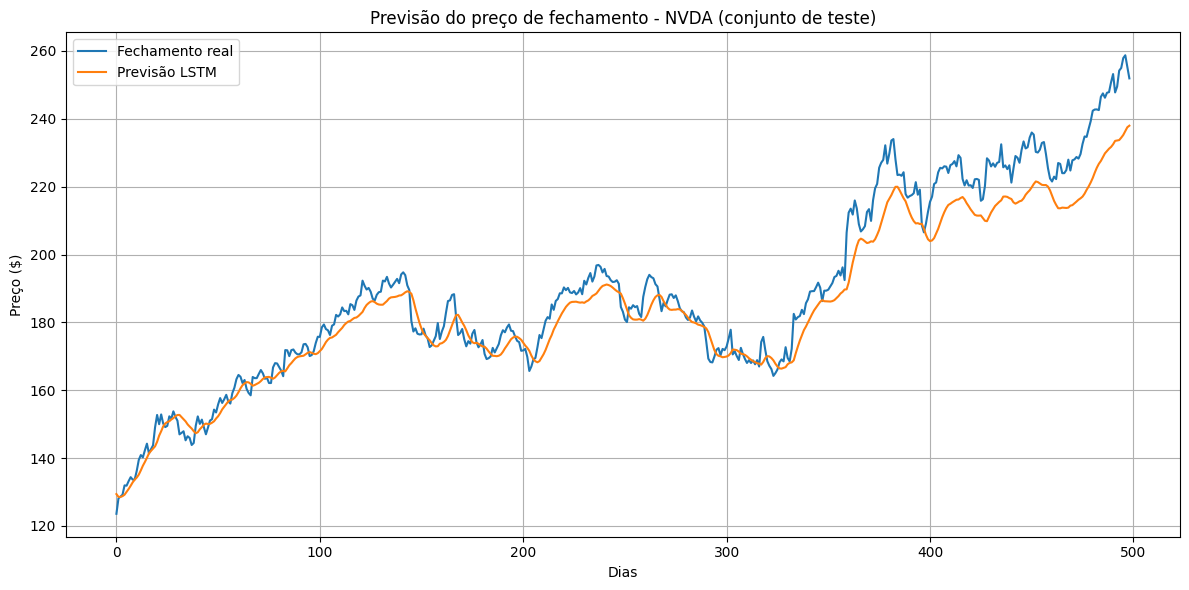

MAE: 5.90 | RMSE: 7.77


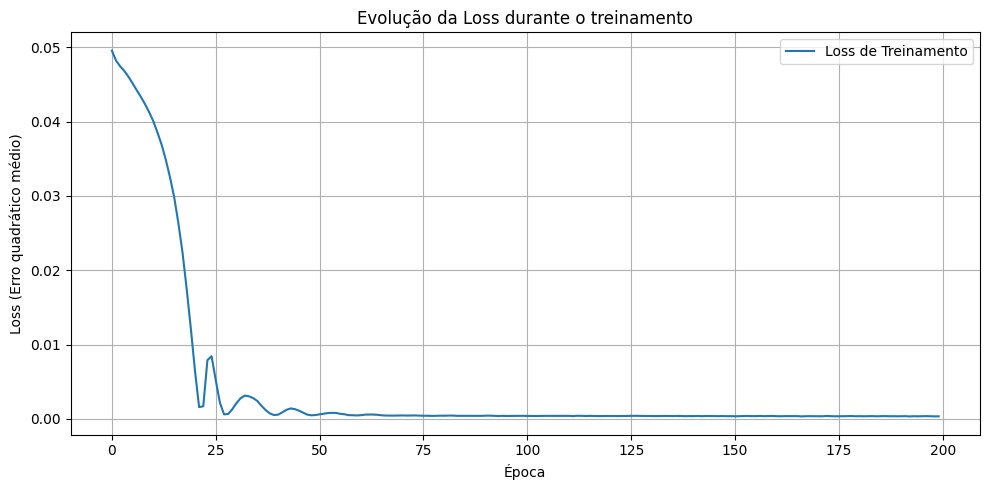

In [46]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import torch
import torch.nn as nn

# 1. Dados
nome_acao = 'NVDA'
dados = yf.download(nome_acao, start='2015-01-01', end='2024-12-31')
precos = dados[['Close']].dropna()

# 2. Normalização
scaler = MinMaxScaler()
precos_normalizados = scaler.fit_transform(precos)

# 3. Lookback e sequência
lookback = 60
future_days = 30
X, y = [], []

for i in range(len(precos_normalizados) - lookback):
    X.append(precos_normalizados[i:i+lookback])
    y.append(precos_normalizados[i+lookback])

X = np.array(X)
y = np.array(y)

# 4. Tensores
X_tensor = torch.tensor(X, dtype=torch.float32).reshape(-1, lookback, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# 5. Modelo
class LSTMModel(nn.Module):
    def __init__(self):
        super().__init__()
        # self.lstm = nn.LSTM(1, 50, 1, batch_first=True) # BÁSICA
        self.lstm = nn.LSTM(input_size=1, hidden_size=64, num_layers=2, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(64, 1)


    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])

model = LSTMModel()
loss_fn = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)

# 6. Treinamento
historico_loss = []
n_epochs = 200
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_tensor)
    loss = loss_fn(output, y_tensor)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % (n_epochs/10) == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.6f}")
    historico_loss.append(loss.item())  # Salva o valor da loss a cada época

# 7. Previsão futura
entrada = X_tensor[-1].unsqueeze(0).detach()
futuro = []

with torch.no_grad():
    for _ in range(future_days):
        pred = model(entrada)
        pred = pred.view(1, 1, 1)
        futuro.append(pred.item())
        entrada = torch.cat([entrada[:, 1:, :], pred], dim=1)

# 8. Desnormaliza
previsoes = scaler.inverse_transform(np.array(futuro).reshape(-1, 1))


# 9. Plotagem dos valores reais vs preditos
plt.figure(figsize=(12, 6))
plt.plot(real_desnormalizado, label='Fechamento real')
plt.plot(pred_desnormalizado, label='Previsão LSTM')
plt.title(f"Previsão do preço de fechamento - {nome_acao} (conjunto de teste)")
plt.xlabel("Dias")
plt.ylabel("Preço ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Métricas de avaliação:

mae = mean_absolute_error(real_desnormalizado, pred_desnormalizado)
rmse = np.sqrt(mean_squared_error(real_desnormalizado, pred_desnormalizado))
print(f"MAE: {mae:.2f} | RMSE: {rmse:.2f}")



# Gráfico de perda
plt.figure(figsize=(10, 5))
plt.plot(historico_loss, label='Loss de Treinamento')
plt.xlabel('Época')
plt.ylabel('Loss (Erro quadrático médio)')
plt.title('Evolução da Loss durante o treinamento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed


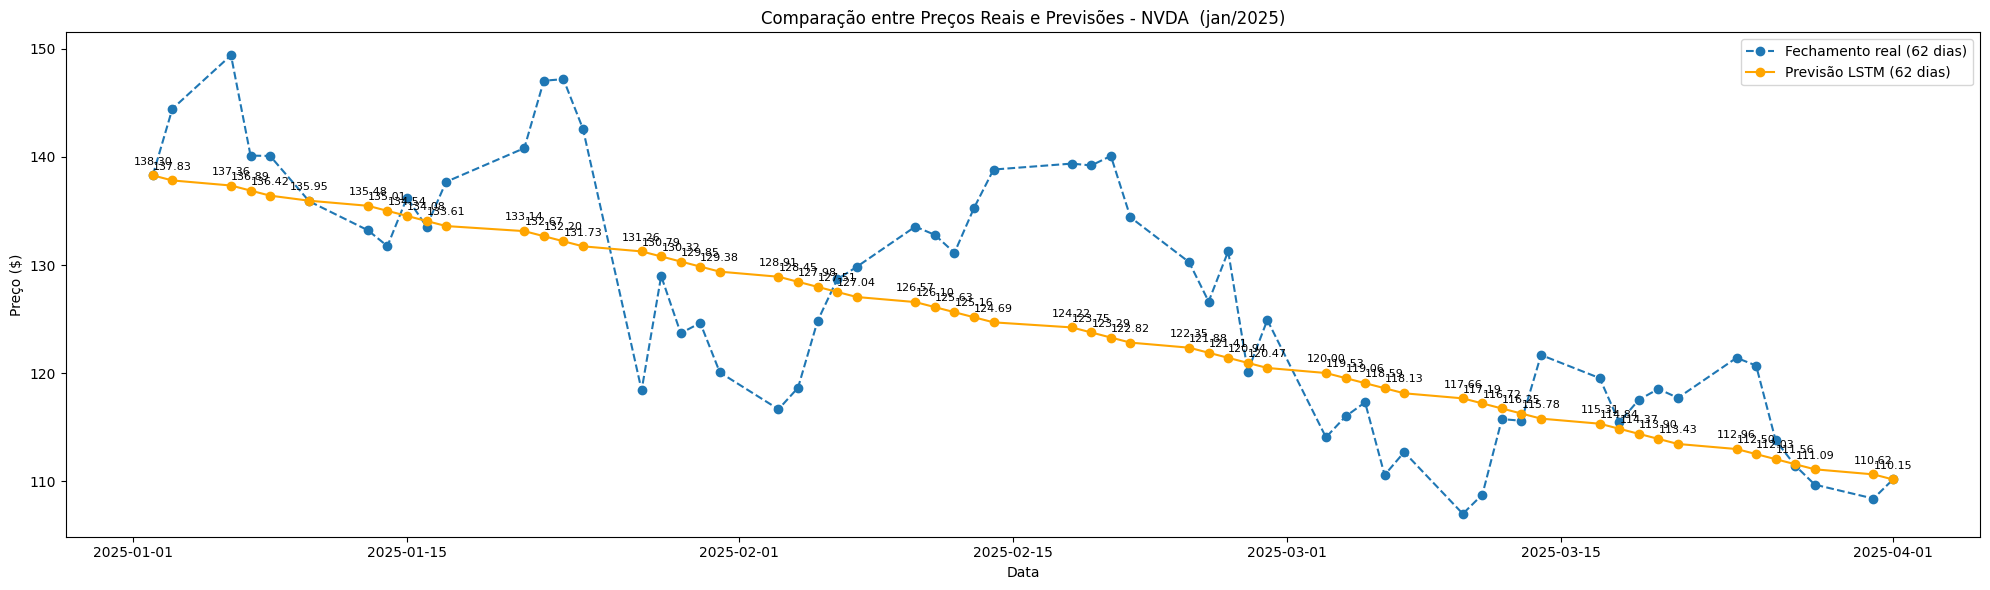

In [94]:
# Baixar os dados reais da AAPL para janeiro de 2025
import pandas_market_calendars as mcal

start = '2025-01-01'
end = '2025-04-02'
nyse = mcal.get_calendar('NYSE') # Calendário da NYSE (também serve para NASDAQ)
pregao = len(nyse.valid_days(start_date=start, end_date=end).tz_localize(None)) # Datas válidas de mercado (pregão)

dados_reais_2025 = yf.download(nome_acao, start, end)
fechamento_real = dados_reais_2025['Close'].iloc[:pregao]  # Garante 5 dias úteis de dados reais

# Usar dados de previsão previamente armazenados (exemplo gerado anteriormente)
# Simulando que 'previsoes' e 'datas_futuras' foram gerados no código anterior
# Aqui, vamos só simular para este código rodar em isolamento
datas_futuras = fechamento_real.index
previsoes = np.linspace(fechamento_real.iloc[0], fechamento_real.iloc[-1], len(fechamento_real))

# Plotar gráfico comparando o fechamento real com as previsões
plt.figure(figsize=(20, 6))
plt.plot(datas_futuras, fechamento_real, label=f"Fechamento real ({pregao} dias)", linestyle='--', marker='o')


plt.plot(datas_futuras, previsoes, label=f"Previsão LSTM ({pregao} dias)", linestyle='-', marker='o', color='orange')
for i, v in enumerate(previsoes):
    plt.text(datas_futuras[i], v + 1, f"{v[0]:.2f}", ha='center', fontsize=8, color='black')
plt.title(f"Comparação entre Preços Reais e Previsões - {nome_acao}  (jan/2025)")
plt.xlabel("Data")
plt.ylabel("Preço ($)")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

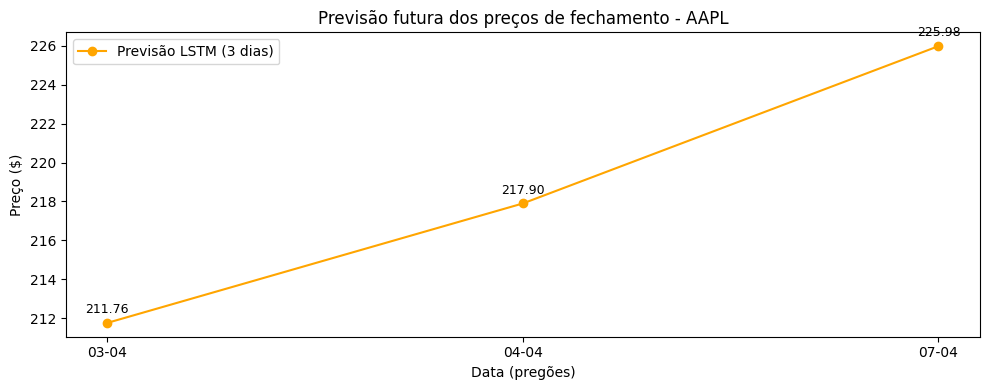

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_market_calendars as mcal

# --- Configurações ---
nome_acao = "AAPL"
dias_prever = 3
data_inicio = pd.Timestamp("2025-04-03")

# --- Gera datas de pregão válidas ---
nyse = mcal.get_calendar("NYSE")
schedule = nyse.schedule(start_date=data_inicio, end_date=data_inicio + pd.Timedelta(days=30))
datas_futuras = schedule.index.tz_localize(None)[:dias_prever]

# --- Simula previsões ---
np.random.seed(0)
previsoes = np.linspace(210, 225, dias_prever) + np.random.normal(0, 1, dias_prever)

# --- Plotagem com eixo categórico ---
plt.figure(figsize=(10, 4))
dias_labels = [data.strftime('%d-%m') for data in datas_futuras]
x = np.arange(len(previsoes))

plt.plot(x, previsoes, label=f"Previsão LSTM ({dias_prever} dias)", marker='o', color='orange')

# Adiciona os valores nos pontos
for i, v in enumerate(previsoes):
    plt.text(i, v + 0.5, f"{v:.2f}", ha='center', fontsize=9)

plt.xticks(x, dias_labels)
plt.title(f"Previsão futura dos preços de fechamento - {nome_acao}")
plt.xlabel("Data (pregões)")
plt.ylabel("Preço ($)")
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()